In [32]:
# import standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic lines
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
#import my scripts
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    scripts_path = os.path.join(module_path, "scripts")
    if scripts_path not in sys.path:
        sys.path.append(scripts_path)
    display(sys.path)
   
from data import get_data
from preprocessing import preprocess, add_new_columns

['/home/louis/code/lewagon/data/04-Decision-Science/01-Project-Setup/context-and-setup',
 '/home/louis/code/JammyNinja/Sandbox/chess_analysis/explore/notebooks',
 '/home/louis/.pyenv/versions/3.10.6/lib/python310.zip',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload',
 '',
 '/home/louis/.pyenv/versions/3.10.6/envs/chess_analysis/lib/python3.10/site-packages',
 '/home/louis/code/JammyNinja/Sandbox/chess_analysis/explore/scripts']

In [40]:
# uncomment to get fresh data, otherwise up to 12-01-2025 is below
raw_data = get_data(df_name="all_games", descriptor="all_cols")
df = preprocess(raw_data)

Looking for all games of chess played on Chess.com by louis
          between 2023-01 and 2025-01
getting 2023/01
getting 2023/02
getting 2023/03
getting 2023/04
getting 2023/05
getting 2023/06
getting 2023/07
getting 2023/08
getting 2023/09
getting 2023/10
getting 2023/11
getting 2023/12
getting 2024/01
getting 2024/02
getting 2024/03
getting 2024/04
getting 2024/05
getting 2024/06
getting 2024/07
getting 2024/08
getting 2024/09
getting 2024/10
getting 2024/11
getting 2024/12
getting 2025/01
Downloaded a total of 5924 games.
file /home/louis/code/JammyNinja/Sandbox/chess_analysis/explore/data/all_games_2023-01_to_2025-01_raw.csv already exists, NOT saving!
Created win/rating columns:
- winner
- user_colour
- user_rating
- user_rating_diff
- user_result
- opp_result
Created moves columns:
- move_numbers
- white_moves
- white_clock
- black_moves
- black_clock
- w_cstl_side
- w_cstl_move
- b_cstl_side
- b_cstl_move
Created final position columns:
- winner_ttl_pieces_count
- loser_ttl_pie

In [12]:
# fname = "all_games_2023-01_to_2025-01_all_new_cols.csv"
# path = os.path.join("..", "data", fname)
# df = pd.read_csv(path)

In [41]:
df['opp_result']

0       checkmated
1              win
2          timeout
3              win
4           agreed
           ...    
5919    checkmated
5920    checkmated
5921    checkmated
5922           win
5923           win
Name: opp_result, Length: 5924, dtype: object

In [15]:
df.columns

Index(['date', 'start_time', 'end_time', 'time_class', 'time_control', 'rated',
       'rules', 'url', 'moves', 'opening_code', 'opening_name',
       'white_username', 'black_username', 'white_clock', 'black_clock',
       'white_rating', 'black_rating', 'result', 'white_result',
       'black_result', 'winner', 'user_win', 'user_colour', 'user_rating',
       'user_rating_diff', 'higher_rated_colour', 'winner_rating_diff',
       'move_numbers', 'white_moves', 'black_moves', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'final_position_fen', 'winner_ttl_pieces_count',
       'loser_ttl_pieces_count', 'winner_pawns_count', 'loser_pawns_count',
       'winner_pieces_only_count', 'loser_pieces_only_count',
       'pieces_count_diff', 'pawns_count_diff', 'winner_material_ttl',
       'loser_material_ttl', 'winner_pcs', 'loser_pcs'],
      dtype='object')

In [43]:
#a pickle file would have remembered the datetimes...
date_cols = ['date', 'start_time', 'end_time']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

### the 18/21 score was achieved on 12/1/25. It was 18/19 before the end. 1300->1400

In [44]:
streak_df = df.set_index("date").loc["2025-01-12"]

In [45]:
streak_df.columns

Index(['start_time', 'end_time', 'time_class', 'time_control', 'rated',
       'rules', 'url', 'moves', 'opening_code', 'opening_name',
       'white_username', 'black_username', 'white_clock', 'black_clock',
       'user_colour', 'user_rating', 'user_rating_diff', 'white_rating',
       'black_rating', 'result', 'winner', 'user_result', 'opp_result',
       'move_numbers', 'white_moves', 'black_moves', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'final_position_fen', 'winner_ttl_pieces_count',
       'loser_ttl_pieces_count', 'winner_pawns_count', 'loser_pawns_count',
       'winner_pieces_only_count', 'loser_pieces_only_count',
       'pieces_count_diff', 'pawns_count_diff', 'winner_material_ttl',
       'loser_material_ttl', 'winner_pcs', 'loser_pcs'],
      dtype='object')

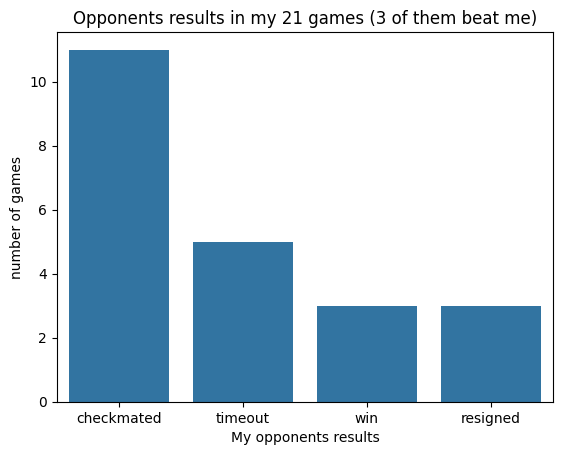

In [62]:
opp_results = streak_df.opp_result.value_counts()

sns.barplot(opp_results)

# plt.annotate(1,7,"hi")
plt.title("Opponents results in my 21 games (3 of them beat me)");
plt.ylabel("number of games")
plt.xlabel("My opponents results");

In [ ]:
analysis_columns = [
    'start_time','moves',
    'white_result', 'black_result',
    'opening_code', 'opening_name',
    'white_clock', 'black_clock',
    'white_rating', 'black_rating',
    'user_colour', 'user_rating', 'user_rating_diff',
    'user_castled', 'opp_castled', 'final_position_fen',
]
#I wish I had:
#user_result column